In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [10]:
file_path = 'student_data.csv'
student_data = pd.read_csv("student_data.csv")

Step 1: Check for missing values

In [12]:
missing_values = student_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [13]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Step 2: Feature selection

In [15]:
selected_features = ['age', 'sex', 'address', 'famsize', 'Medu', 'Fedu', 
                     'traveltime', 'studytime', 'failures', 'schoolsup', 
                     'famsup', 'paid', 'activities', 'higher', 'internet', 
                     'absences', 'G1', 'G2']  # Features for training
target = 'G3'  # Final grade

# Copy relevant data and encode categorical variables
encoded_data = student_data[selected_features + [target]].copy()
categorical_columns = encoded_data.select_dtypes(include='object').columns

# Label encoding for categorical variables
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    encoded_data[col] = label_encoders[col].fit_transform(encoded_data[col])

Step 3: Scaling numeric data

In [17]:
scaler = StandardScaler()
numeric_columns = encoded_data.select_dtypes(include='number').columns.drop(target)
encoded_data[numeric_columns] = scaler.fit_transform(encoded_data[numeric_columns])


Step 4: Train-test split

In [19]:

X = encoded_data[selected_features]
y = encoded_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 5: Train Decision Tree Regressor

In [21]:

decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

Step 6: Predict and evaluate

In [23]:
from sklearn.metrics import root_mean_squared_error
y_pred = decision_tree.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 1.7293872982986682


Root Mean Square Error (RMSE): 1.7293872982986682

Step 7: Analyze feature importance


Feature Importances:
        Feature  Importance
17          G2    0.781819
15    absences    0.161947
0          age    0.036793
12  activities    0.010903
8     failures    0.004293
16          G1    0.002432
1          sex    0.001131
6   traveltime    0.000274
5         Fedu    0.000196
4         Medu    0.000137
7    studytime    0.000077
3      famsize    0.000000
10      famsup    0.000000
11        paid    0.000000
13      higher    0.000000
14    internet    0.000000
2      address    0.000000
9    schoolsup    0.000000


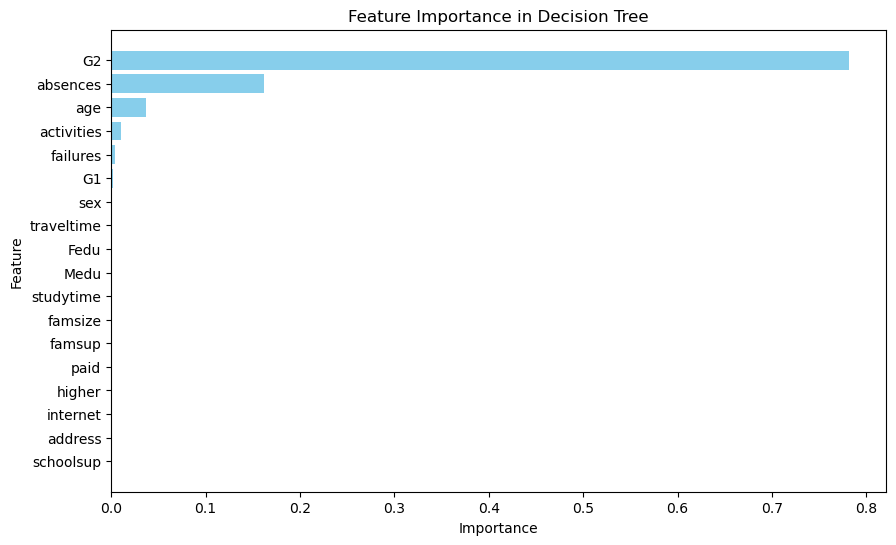

In [39]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

In [27]:
import pickle

# Save the trained Decision Tree model
with open("decision_tree_model.pkl", "wb") as model_file:
    pickle.dump(decision_tree, model_file)

# Save the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the label encoders
with open("label_encoders.pkl", "wb") as encoder_file:
    pickle.dump(label_encoders, encoder_file)
